In [4]:
pip install textblob



[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 626.3/626.3 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB 2.7 MB/s eta 0:00:00
     -------------------------------------- 269.0/269.0 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 1.4 MB/s eta 0:00:00


In [5]:
pip install wordcloud


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


In [9]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.Collecting openpyxl
     -------------------------------------- 251.4/251.4 kB 1.3 MB/s eta 0:00:00




[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Flight was amazing. The crew onboard this flight were very welcoming, and gave a good atmosphere. The crew serving my aisle goes by the initial â€œGâ€. She was very kind & helpful. Gave my mom a bday cake for a late celebration even though it was just a 1hr 45min flight. Seat is well sanitized, legroom is spacious. IFE onboard has many variety of shows, music, etc. Bathroom always kept clean by crew at all times. & Food was delicious, overall this flight is a 9/10
Sentiment(polarity=0.3846666666666667, subjectivity=0.5599999999999999)
Sentiment(polarity=1.0, subjectivity=0.3)
0      Flight was amazing. The crew onboard this fl...
1    Â Â Booking an emergency exit seat still meant...
2      Excellent performance on all fronts. I would...
3     Pretty comfortable flight considering I was f...
4     The service was consistently good from start ...
Name: Reviews, dtype: object
count    8100.000000
mean      828.488395
std       580.111920
min       108.000000
25%       423.000000
50%  

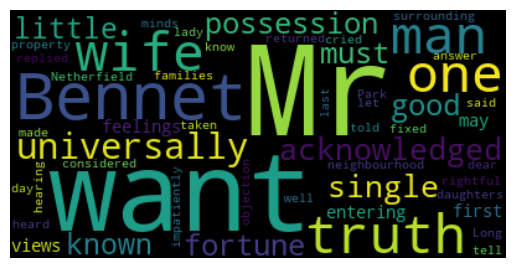

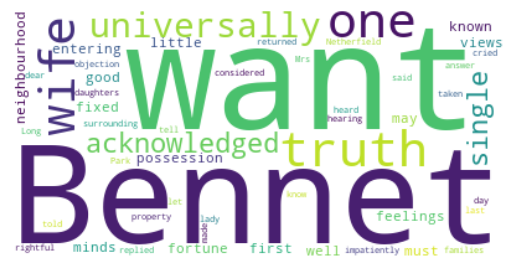

In [10]:
# S7 - Sentiment analysis

# S7A - Basic sentiment analysis (polaitry, word cloud, etc.)
import pandas as pd
import numpy as np
import datetime as dt
import openpyxl
from datetime import datetime
import random
from textblob import TextBlob

url1='https://github.com/HSangwan/Datasets/raw/main/Airlines-Reviews-Data.xlsx'
AR = pd.read_excel(url1, header=0)

# checking polarity of sentence
print(AR['Reviews'][0])
v1=TextBlob(AR['Reviews'][0])
v2=TextBlob('This is the best course on SM I have ever taken')

v1.sentiment
v2.sentiment

print(v1.sentiment)
print(v2.sentiment)

#length of reviews
print(AR['Reviews'].head())
length_reviews = AR['Reviews'].str.len()
#print(length_reviews.mean(), max(length_reviews), min(length_reviews))
print(length_reviews.describe())

# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS

text='It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.' \
'However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters.'\
'My dear Mr. Bennet," said his lady to him one day, have you heard that Netherfield Park is let at last? Mr. Bennet replied that he had not.'\
'But it is,returned she; for Mrs. Long has just been here, and she told me all about it.Mr. Bennet made no answer.'\
'Do not you want to know who has taken it? cried his wife impatiently. You want to tell me, and I have no objection to hearing it.'

cloud_text = WordCloud().generate(text)
plt.imshow(cloud_text, interpolation='bilinear')
plt.axis('off')
plt.show()

# we can change background colour, size and font of the words, and can include stopwords
#?WordCloud

cloud_text = WordCloud(background_color='white', stopwords =['man','Mr']+list(STOPWORDS)).generate(text)
plt.imshow(cloud_text, interpolation='bilinear')
plt.axis('off')
plt.show()

#updating stopwords
# mystopwords=set(STOPWORDS)
#my_stopwords.update(['man', 'Mr', 'woman'])
#cloud_text = WordCloud(background_color='white', stopwords =my_stopwords).generate(text)


In [11]:
# S7 - Sentiment analysis

# S7B - Bag of words (BoW), n-gram
import pandas as pd
import numpy as np
import datetime as dt
import openpyxl
from zipfile import ZipFile
from datetime import datetime
import random
from textblob import TextBlob

url1='https://github.com/HSangwan/Datasets/raw/main/Airlines-Reviews-Data.xlsx'
AR = pd.read_excel(url1, header=0)

url2='https://github.com/HSangwan/Datasets/raw/main/InstagramThreads_Reviews-Data.csv'
IG=pd.read_csv(url2, header=0)
print(IG.head())

# Bag of Words (BoW)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

vect = CountVectorizer(max_features=100)
vect.fit(AR['Reviews'])
X = vect.transform(AR['Reviews'])
print(vect.get_feature_names_out())
print(X)

# using default stopwords
#vect = CountVectorizer(max_features=100, stop_words=list(ENGLISH_STOP_WORDS))
# custom stopwords
#mystopwords=ENGLISH_STOP_WORDS.union(['airlines', 'airport', 'security'])


#Transform to an array
my_array = X.toarray()

# trandsform back to a dataframe, assign column names
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names_out())
print(X_df.head())

# N-gram analysis
# ngram_range=(min_n, max_n))
#CountVectorizer(max_features, max_df, min_df)
# max_df (min_df): ignore terms with higher (lower) than specified frequency

vect = CountVectorizer(max_features=100, ngram_range=(2, 3))
vect.fit(AR['Reviews'])
X = vect.transform(AR['Reviews'])
print(vect.get_feature_names_out())
print(X)

#Transform to an array
my_array = X.toarray()

# trandsform back to a dataframe, assign column names
X_df = pd.DataFrame(my_array, columns=vect.get_feature_names_out())
print(X_df.head())

        source                                 review_description  rating  \
0  Google Play  Meh. Not the greatest experience on a Chromebo...       2   
1  Google Play  Pretty good for a first launch!! Its easy to u...       3   
2  Google Play  For a brand new app, it's very well optimized....       3   
3  Google Play  Great app with a lot of potential! However, th...       3   
4  Google Play  The app is good, but it needs a lot of functio...       3   

       review_date  
0   7/8/2023 14:18  
1  7/19/2023 20:52  
2   7/6/2023 23:03  
3   7/10/2023 0:53  
4   7/6/2023 16:57  
['about' 'after' 'again' 'air' 'airline' 'airlines' 'airport' 'all' 'an'
 'and' 'are' 'as' 'at' 'back' 'be' 'been' 'before' 'boarding' 'business'
 'but' 'by' 'cabin' 'check' 'class' 'could' 'crew' 'customer' 'did' 'doha'
 'dubai' 'economy' 'emirates' 'even' 'experience' 'first' 'flight'
 'flights' 'food' 'for' 'from' 'get' 'good' 'great' 'had' 'have' 'hours'
 'if' 'in' 'is' 'istanbul' 'it' 'just' 'me' 'meal'

In [12]:
# S7 - Sentiment analysis

# S7C - Enrich the existing dataset with features related to the text column (capturing the sentiment)
# Features: length of reviews, # sentences in a review, # punctuations in a review, parts of speech involved in a review
# language of the text

import pandas as pd
import numpy as np
import datetime as dt
import openpyxl
from zipfile import ZipFile
from datetime import datetime
import random
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

url1='https://github.com/HSangwan/Datasets/raw/main/Airlines-Reviews-Data.xlsx'
AR = pd.read_excel(url1, header=0)

url2='https://github.com/HSangwan/Datasets/raw/main/InstagramThreads_Reviews-Data.csv'
IG=pd.read_csv(url2, header=0)


# tokenize words, i.e., break it down into individual components
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize   # sentence as a token
from nltk.tokenize import TreebankWordTokenizer # tokenize individual words
from nltk.tokenize import WordPunctTokenizer # splits words based on punctuation boundaries. Each punctuation mark is treated as a separate token.
from nltk.tokenize import RegexpTokenizer # regular expression pattern, i.e., discarding punctuations

text='It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.' \
'However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters.'\
'My dear Mr. Bennet," said his lady to him one day, have you heard that Netherfield Park is let at last? Mr. Bennet replied that he had not.'\
'But it is,returned she; for Mrs. Long has just been here, and she told me all about it.Mr. Bennet made no answer.'\
'Do not you want to know who has taken it? cried his wife impatiently. You want to tell me, and I have no objection to hearing it.'

text1='What a weather!, I think I will go for a walk'
word_tokenize(text1)
sent_tokenize(text)

#length of reviews
len_tokens = []
for i in range(len(AR['Reviews'])):
  len_tokens.append(len(AR['Reviews'][i]))

AR['n_tokens'] = len_tokens
print(AR.head())

# checking if a string is composed only of letters, digits, or alphanumeric
#my_string.isalpha()
#my_string.isdigit()
#my_string.isalnum()

word_tokens = [word_tokenize(i) for i in AR['Reviews']]
cleaned_tokens = [[word for word in item if word.isalpha()] for item in word_tokens]
print(len(word_tokens[10]),len(cleaned_tokens[10]))

import re
my_string = 'Wonder##fulday'
# Extract #, followed by any letter, small or capital
x = re.search('#[A-Za-z]', my_string)
print(x)

# Default token pattern in CountVectorizer '\b\w\w+\b'
# Specify a particular token pattern CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b')

# detecting language of the text
!pip install langdetect
import langdetect
from langdetect import detect_langs
detect_langs(text)

#detecting language of each of the reviews
languages = []
for i in range(len(AR['Reviews'])):
  languages.append(detect_langs(AR['Reviews'][i]))

languages[1:10]

# Transform the first list to a string and split on a colon
#str(languages[0]).split(':')
#languages = [str(lang).split(':')[0] for lang in languages]
#AR['language'] = languages
#print(AR['language'].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


                                  Title              Name Review Date  \
0                    Flight was amazing  Alison Soetantyo  2024-03-01   
1  seats on this aircraft are dreadful      Robert Watson  2024-02-21   
2          Food was plentiful and tasty             S Han  2024-02-20   
3        â€œhow much food was available          D Laynes  2024-02-19   
4   â€œservice was consistently goodâ€         A Othman   2024-02-19   

              Airline Verified  \
0  Singapore Airlines     True   
1  Singapore Airlines     True   
2  Singapore Airlines     True   
3  Singapore Airlines     True   
4  Singapore Airlines     True   

                                             Reviews Type of Traveller  \
0    Flight was amazing. The crew onboard this fl...      Solo Leisure   
1  Â Â Booking an emergency exit seat still meant...      Solo Leisure   
2    Excellent performance on all fronts. I would...    Family Leisure   
3   Pretty comfortable flight considering I was f...      So

  DEPRECATION: langdetect is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 981.5/981.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for langdetect: started
  Running setup.py install for langdetect: finished with status 'done'


[[en:0.9999965542503328],
 [en:0.9999947055933593],
 [en:0.999994929497486],
 [en:0.999997075463674],
 [en:0.9999966035535702],
 [en:0.999996567386816],
 [en:0.9999987295806514],
 [en:0.99999608906989],
 [en:0.9999939833435842]]

In [13]:
# S7 - Sentiment analysis

# S7D - Stemming and lemmatization
# TF/IDF: Term frequency (TF) / Inverse document frequency (IDF)

import pandas as pd
import numpy as np
import datetime as dt
import openpyxl
from zipfile import ZipFile
from datetime import datetime
import random
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize   # sentence as a token
from nltk.tokenize import TreebankWordTokenizer # tokenize individual words
from nltk.tokenize import WordPunctTokenizer # splits words based on punctuation boundaries. Each punctuation mark is treated as a separate token.
from nltk.tokenize import RegexpTokenizer # regular expression pattern, i.e., discarding punctuations

url1='https://github.com/HSangwan/Datasets/raw/main/Airlines-Reviews-Data.xlsx'
AR = pd.read_excel(url1, header=0)

url2='https://github.com/HSangwan/Datasets/raw/main/InstagramThreads_Reviews-Data.csv'
IG=pd.read_csv(url2, header=0)

#Stemming
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()

porter.stem('universally')
porter.stem('beautiful')
porter.stem('acknowledged')

print(porter.stem('universally'),porter.stem('beautiful'),porter.stem('acknowledged'))

#Stemming a sentence
text1='What a weather!, I think I will go for a walk'
text2= 'However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered as the rightful property of some one or other of their daughters.'

tokens = word_tokenize(text2)
stemmed_tokens = [porter.stem(token) for token in tokens]
stemmed_tokens

# Lemmatization of a string
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
WNlemmatizer = WordNetLemmatizer()
WNlemmatizer.lemmatize('beautifying', pos='v')

#TFIDF: Term frequency (TF) / Inverse document frequency (IDF)
# Arguments of TfidfVectorizer: max_features, ngrams_range, stop_words, token_pattern, max_df, min_df

from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5).fit(AR['Reviews'])
X = vect.transform(AR['Reviews'])
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out())
X_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


univers beauti acknowledg


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...


,and,in,the,to,was
0,0.179865,0.000000,0.537133,0.000000,0.824097
1,0.447408,0.536542,0.668050,0.000000,0.256239
2,0.624600,0.000000,0.621750,0.308770,0.357720
3,0.318874,0.318668,0.740646,0.105090,0.487001
4,0.138157,0.000000,0.825161,0.273191,0.474751
